Statevector (Amplitudes):


<IPython.core.display.Latex object>


The Circuit Diagram:


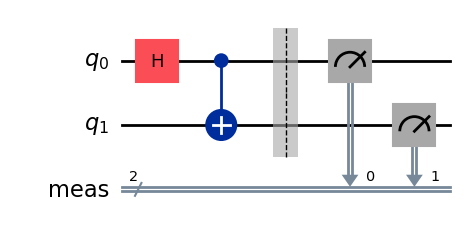


Measurement Counts (Should be ~50/50 split of 00 and 11):
{'11': 992, '00': 1008}


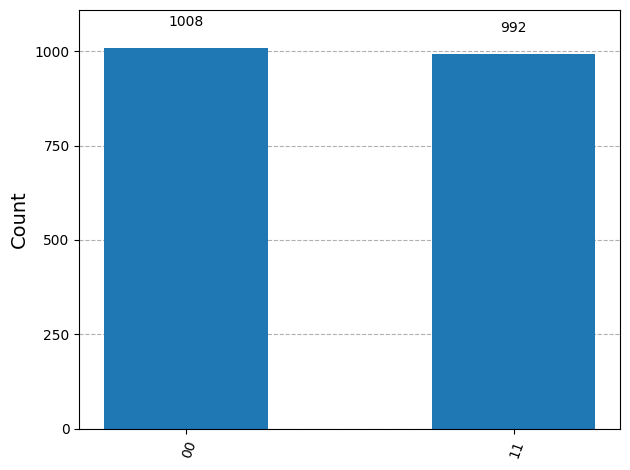

In [1]:
# --- Day 4: Creating Entanglement (The Bell State) ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# 1. Initialize Circuit with 2 Qubits
# q0 = Control (Alice), q1 = Target (Bob)
qc = QuantumCircuit(2)

# 2. Create the Entanglement
qc.h(0)     # Put q0 into superposition (50% 0, 50% 1)
qc.cx(0, 1) # CNOT: If q0 is 1, flip q1.

# Optional: Snapshot the state vector before measurement to see the math
psi = Statevector(qc)
print("Statevector (Amplitudes):")
display(psi.draw('latex'))  # This prints the math equation nicely!

# 3. Measure
qc.measure_all()

# 4. Visualize the Circuit
print("\nThe Circuit Diagram:")
display(qc.draw(output='mpl'))

# 5. Run Simulation
sim = AerSimulator()
# High shots to prove the correlation is strong
result = sim.run(qc, shots=2000).result()
counts = result.get_counts()

# 6. Analyze
print("\nMeasurement Counts (Should be ~50/50 split of 00 and 11):")
print(counts)
display(plot_histogram(counts))